### <font color='blue'>NATURAL LANGUAGE PROCESSING - CS5803 </font>
**<font color='blue'>Project Work:</font>**  *Rumour Detection*

**<font color='blue'>Group Members:</font>**
   1. Sandhya Addetla (AI20RESCH14001)
   2. Kranthi Kumar Pasagadugula (AI20RESCH14002)
 
**<font color='blue'>Overview of the Project:</font>**

The usage of social networks allowed a rapid spreading of information in real-time, regardless of the credibility of this information, which created unparalleled challenges in information reliability assurance. Misinformation spreading relates specially to breaking news, where he information is released gradual, often starting as unverified information

**<font color='blue'>Motivation for this Project:</font>**

Main motivation for taking up this project is that 
 * Difficult to distinguish rumours by humans.
 * crucial to track and debunk rumors early to minimize their harmful effects.
 * During the outbreak of COVID-19 pandemic, social media platform used for information of new revelations. Some of the information is factual, others are rumours. This causes adverse effect on individuals and society. Identify rumours and stop them before they become viral.
 * Online fact-checking services have limited topical coverage and long delay.

Automatically identifying rumors from in social media especially in microblogging sites is an important research work.

**<font color='blue'>Proposed Solution:</font>**

Bi-Directional Long Short-Term Memory with Convolutional Neural Network is used as it catergorizes a sentence as rumour or non-rumour, considering the Contextual information in both forward and backward direction. 

 

**<font color='blue'>Datasets:</font>**

We use Twitter15, Twitter16 , PHEME as training data to train our binary rumour classification models. For Twitter15 and
Twitter16, there are originally 4 classes: true rumours, false rumours, unverified
rumours and non-rumours; we collapse the true, false and unverified rumours into the rumour
class. Statistics of the datasets are as given below:

||Twitter15|Twitter16|Pheme| COVID-19 |
|------|------|------|------|------|
|#source tweets  |1490  |818  | 5800 | 313036|
|#rumours  |1118  |613  | 2406 | - |
|#non-rumours  |372  |205  | 3754 | - |


   


**<font color='blue'>The code has been implemented using Keras Libraries.</font>**

In [1]:
# Import of basic packages
import pandas as pd 
import numpy as np
#import re
import collections
import matplotlib.pyplot as plt

# Import of packages for data preparation
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Import of Packages for creating, training and evaluating the models
from keras import models
from keras import layers
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
#from keras.layers import Dense,Activation,SimpleRNN
from keras.layers import Dense, Input, LSTM, Bidirectional
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.layers import Flatten, Activation, Dropout
from keras.optimizers import Adam,Adagrad
from keras import regularizers
from keras import optimizers
import keras
from keras_self_attention import SeqSelfAttention
from keras.utils import plot_model


%matplotlib notebook

**<font color='blue'>Loading the Training data from Pheme & Twitter15 datasets and Test data from Twitter16
The datasets contain the tweet and the label for the tweet</font>**

The public datasets (Pheme, Twitter15 & Twiiter16) available online have been preprocessed and converted into CSV files. 

In [2]:
#Loading Train data from Pheme and Twitter15
df = pd.read_csv("PhemeTwitter15_TFU_NR.csv", encoding='ISO-8859-1')

#Loading Test data from Twitter16
df_test = pd.read_csv("Twitter16_R-TFU_NR.csv", encoding='ISO-8859-1')
df.head(10)

,Tweet,label
0,If the #CharlieHebdo killings are what many th...,NR
1,"Today's #CharlieHebdo cover on Houellebecq:""In...",NR
2,Charlie Hebdo\u2019s Last Tweet@ Before Shootings,NR
3,Prediction:@ the #CharlieHebdo massacre will n...,NR
4,10:28am Charlie Hebdo account mocks ISIS leade...,NR
5,Charlie Hebdo became well known for publishing...,NR
6,If your faith isn't strong enough to cope with...,NR
7,Just arrived at scene of massacre #Paris #char...,NR
8,Police car with bullet holes in front of Charl...,NR
9,Every newspaper in Europe should publish those...,NR


**<font color='blue' size='4'>Pre-processing the data</font>**
1. All tweets are converted into lower case.
2. The punctuations, stopwords and rare words are removed.
  

   **<font color='blue'>Converting to Lowercase</font>**

In [3]:
#Convert the tweets in the train and test datasets to lowercase
#For Train data
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Tweet'].head(10)

#For Test data
df_test['Tweet'] = df_test['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_test['Tweet'].head(10)


0     correct predictions in back to the future ii url
1    .@whitehouse in rainbow colors for #scotusmarr...
2    cops bought the alleged church shooter burger ...
3    ð¥ca kkk grand wizard ð¥ endorses @hillary...
4    an open letter to trump voters from his top st...
5      god put a rainbow over the white house ð url
6    craigslist ad: âget paid $15 an hour to prot...
7    #quasimodo: dog with short spine has big heart...
8    need to #getcovered? most people can find a he...
9    #wakeupamericaðºð¸ who needs a #gun regist...
Name: Tweet, dtype: object

**<font color='blue'>Removal of Punctuation Marks</font>**

In [4]:
# Removal of Punctuation marks from train and test datasets
#For Train data
df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','')
df['Tweet'].head(10)

#For Test data
df_test['Tweet'] = df_test['Tweet'].str.replace('[^\w\s]','')
df_test['Tweet'].head(10)

<ipython-input-4-57517c6010a4>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','')
<ipython-input-4-57517c6010a4>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['Tweet'] = df_test['Tweet'].str.replace('[^\w\s]','')


0     correct predictions in back to the future ii url
1    whitehouse in rainbow colors for scotusmarriag...
2    cops bought the alleged church shooter burger ...
3    ðca kkk grand wizard ð endorses hillaryclinton...
4    an open letter to trump voters from his top st...
5         god put a rainbow over the white house ð url
6    craigslist ad âget paid 15 an hour to protest ...
7    quasimodo dog with short spine has big heart u...
8    need to getcovered most people can find a heal...
9    wakeupamericaðºð who needs a gun registry when...
Name: Tweet, dtype: object

**<font color='blue'>Removal of Stopwords</font>**

In [5]:
#Remove the stop words from the tweets using the nltk corpus
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df['Tweet'].head(10)

df_test['Tweet'] = df_test['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df_test['Tweet'].head(10)

0               correct predictions back future ii url
1    whitehouse rainbow colors scotusmarriage heres...
2    cops bought alleged church shooter burger king...
3    ðca kkk grand wizard ð endorses hillaryclinton...
4    open letter trump voters top strategistturnedd...
5                    god put rainbow white house ð url
6    craigslist ad âget paid 15 hour protest trump ...
7          quasimodo dog short spine big heart url url
8    need getcovered people find health insurance p...
9    wakeupamericaðºð needs gun registry obama pers...
Name: Tweet, dtype: object

In [6]:
#Removing rare words from the dataset by checking the frequency

#find all the tweets with minimum frequency

#For train data
rare_words = pd.Series(' '.join(df['Tweet']).split()).value_counts()[-10:]
rare_words

#For test data
rare_words_test = pd.Series(' '.join(df_test['Tweet']).split()).value_counts()[-10:]
rare_words_test

fear         1
lowered      1
sample       1
critical     1
sundown      1
imagery      1
la           1
analysis     1
surprised    1
mcmillen     1
dtype: int64

**<font color='blue'>Remove tweets with rare words</font>**

In [7]:
#Remove the tweets with rare words
rare_words = list(rare_words.index)
rare_words_test = list(rare_words_test.index)

df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))
df['Tweet'].head(10)

df_test['Tweet'] = df_test['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words_test))
df_test['Tweet'].head(10)

0               correct predictions back future ii url
1    whitehouse rainbow colors scotusmarriage heres...
2    cops bought alleged church shooter burger king...
3    ðca kkk grand wizard ð endorses hillaryclinton...
4    open letter trump voters top strategistturnedd...
5                    god put rainbow white house ð url
6    craigslist ad âget paid 15 hour protest trump ...
7          quasimodo dog short spine big heart url url
8    need getcovered people find health insurance p...
9    wakeupamericaðºð needs gun registry obama pers...
Name: Tweet, dtype: object

**<font color='blue'>Train tweets and labels and Test tweets and labels </font>**

The evaluation of the model performance needs to be done on a separate test set. As such, we can estimate how well the model generalizes. This is done with the train_test_split method of scikit-learn (When Pheme is used as train and test set)

In [8]:
#The train_test_split function is used when train and test data taken from same file.
#X_train, X_test, y_train, y_test = train_test_split(df.Tweet, df.label, test_size=0.2, random_state=51)

#Separate the input and label from train data
X_train = df['Tweet']
y_train = df['label']

#Separate input and label from test data
X_test = df_test['Tweet']
y_test = df_test['label']

print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 7290
# Test data samples: 818


**<font color='blue'>Converting words to numbers </font>**

To use the text as input for a model, we first need to convert the tweet's words into tokens, which simply means converting the words to integers that refer to an index in a dictionary. Here we will only keep the most frequent words in the train set.

In [9]:
# Text Preprocessing with Keras tokenizer
from keras.preprocessing.text import Tokenizer
max_features = 10000 ## Parameter indicating the number of words we'll put in the dictionary
max_len = 40
# Define Tokenizer
tk = Tokenizer(num_words=max_features)
# Fit Tokenizer on text 
tk.fit_on_texts(X_train)
word_index = tk.word_index
print('No of unique words {:,}'.format(len(word_index)))
print('Tokenizer fitted on {} documents'.format(tk.document_count))
print('Number of words in dictionary: {}'.format(tk.num_words))
print('The most common top 10 words are', collections.Counter(tk.word_counts).most_common(10))

No of unique words 13,349
Tokenizer fitted on 7290 documents
Number of words in dictionary: 10000
The most common top 10 words are [('url', 1926), ('ferguson', 1259), ('police', 1144), ('charliehebdo', 956), ('sydneysiege', 626), ('ottawa', 599), ('sydney', 583), ('breaking', 518), ('paris', 488), ('shooting', 486)]


**<font color='blue'>After creating dictionary(vocabulary), we convert the text to a list of integer indexes. This is done with the text_to_sequences method of the Tokenizer.</font>**

In [10]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train[1], X_train_seq[1]))

"todays charliehebdo cover houellebecqin 2022 ill observe ramadan" is converted into [204, 4, 283, 5620, 3734, 494, 2909, 3735]


**<font color='blue'>Padding the sequences to max_len</font>**

In [11]:
X_train_seq = pad_sequences(X_train_seq,maxlen=max_len)
X_test_seq = pad_sequences(X_test_seq,maxlen=max_len)
X_train_seq.shape

(7290, 40)

**<font color='blue'>The target classes/labels are also converted to numbers using label encoder</font>**

In [12]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
#print(y_train_le)
#print(y_test_le)

**<font color='blue'> Using Fast text for word embedding</font>**

In [13]:
import os, codecs
from tqdm import tqdm
#load embeddings
print('loading word embeddings...')
embeddings_index = {}
f = codecs.open('wiki.simple.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

embed_dim = 300
#embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(max_features , len(word_index))
embedding_matrix = np.zeros((nb_words, embed_dim))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
#print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))


1349it [00:00, 12642.25it/s]

loading word embeddings...


111052it [00:08, 12454.14it/s]

found 111052 word vectors
preparing embedding matrix...


**<font color='blue'> Using Glove for word embedding</font>**

In [14]:
'''
from keras.layers import Embedding
from keras.initializers import Constant
embeddings_index = {}
f = open('glove.twitter.27B.100d.txt',encoding='utf8')
for line in f:
    values = line.split(' ')
    word = values[0] ## The first entry is the word
    coefs = np.asarray(values[1:], dtype='float32') ## These are the vecotrs representing the embedding for the word
    embeddings_index[word] = coefs
f.close()

print('GloVe data loaded')
## More code adapted from the keras reference (https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py)
# prepare embedding matrix 


## EMBEDDING_DIM =  ## seems to need to match the embeddings_index dimension
embed_dim = embeddings_index.get('a').shape[0]
num_words = min(max_features , len(word_index)) + 1
embedding_matrix = np.zeros((num_words, embed_dim))
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings_index.get(word) ## This references the loaded embeddings dictionary
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,embed_dim, embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_features,
                            trainable=False)
'''
print("Glove word embedding")

Glove word embedding


**<font color='blue'> Using GoogleVec for word embedding</font>**

In [15]:
'''
from gensim.models import KeyedVectors
embed_size=300
EMBEDDING_FILE = 'GoogleNews-vectors-negative300.bin'
embeddings_index = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

word_index = tk.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = (np.random.rand(nb_words, embed_size) - 0.5) / 5.0
for word, i in word_index.items():
    if i >= max_features: continue
    if word in embeddings_index:
        embedding_vector = embeddings_index.get_vector(word)
        embedding_matrix[i] = embedding_vector
## Peeking at the embedding matrix values
print(embedding_matrix.shape)
'''
print(" GoogleVec word embedding")

 GoogleVec word embedding


**<font color='blue' size=5> Deep Learning Model</font>**

**BiLSTM+CNN model**

In [16]:
# create the model

#embed_dim = 128
model = Sequential()

#Embedding layer creation for using GLOVE word embedding
#model.add(Embedding(num_words, 100, input_length=40, weights= [embedding_matrix], trainable=False))

#Embedding layer creation for using FAST TEXT word embedding
model.add(Embedding(max_features, embed_dim,weights=[embedding_matrix], input_length=max_len, trainable=False))

#Embedding layer creation for using GoogleVec word embedding
#model.add(Embedding(max_features, embed_size,weights=[embedding_matrix], input_length=max_len, trainable=False))

#Embedding Layer creating without using any word embedding
#model.add(Embedding(max_features, embed_dim,input_length = max_len))

model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(278,return_sequences = True),merge_mode="sum"))

#Self Attention Layer
#model.add(SeqSelfAttention(attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
#                       kernel_regularizer=keras.regularizers.l2(1e-4),
#                       bias_regularizer=keras.regularizers.l1(1e-4),
#                       attention_regularizer_weight=1e-4,
#                       name='Attention'))

model.add(Conv1D(filters=8, kernel_size=2, padding='valid', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.AUC()])
#model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 300)           3000000   
_________________________________________________________________
dropout (Dropout)            (None, 40, 300)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 40, 278)           1287696   
_________________________________________________________________
conv1d (Conv1D)              (None, 39, 8)             4456      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 19, 8)             0         
_________________________________________________________________
flatten (Flatten)            (None, 152)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

**<font color='blue' size='4'> Fit model on Train data</font>**

In [17]:
batch_size = 32
t_acc = 0
val_loss = []
val_accuracy = []
train_loss = []
train_accuracy = []
for i in range(0,30):
    history=model.fit(X_train_seq,y_train_le, epochs =1, batch_size=batch_size,validation_split=0.1, verbose=2)
    score,acc = model.evaluate(X_test_seq, y_test_le, verbose = 2, batch_size = batch_size)
    val_loss.append(history.history['val_loss'][0])
    val_accuracy.append(history.history['val_accuracy'][0])
    train_loss.append(history.history['loss'][0])
    train_accuracy.append(history.history['accuracy'][0])
    print('Epoch: ',i)
    # Early stopping
    if acc > t_acc:
        # Saving model
        model.save("NLP_Model")
        t_acc = acc
        print(i,t_acc)

206/206 - 24s - loss: 0.5208 - accuracy: 0.7398 - val_loss: 0.6198 - val_accuracy: 0.6735
26/26 - 1s - loss: 0.6250 - accuracy: 0.6834
Epoch:  0
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: NLP_Model\assets
0 0.6833741068840027
206/206 - 22s - loss: 0.4446 - accuracy: 0.7930 - val_loss: 0.6406 - val_accuracy: 0.6886
26/26 - 1s - loss: 0.6358 - accuracy: 0.6932
Epoch:  1
INFO:tensorflow:Assets written to: NLP_Model\assets
1 0.6931540369987488
206/206 - 23s - loss: 0.4336 - accuracy: 0.8014 - val_loss: 0.6417 - val_accuracy: 0.6694
26/26 - 1s - loss: 0.6365 - accuracy: 0.6711
Epoch:  2
206/206 - 24s - loss: 0.4115 - accuracy: 0.8081 - val_loss: 0.5839 - val_accuracy: 0.7023
26/26 - 1s - loss: 0.5943 - accuracy: 0.6980
Epoch:  3
INFO:tensorflow:Assets written to: NLP_M

**<font color='blue'> Plot Model Accuracy</font>**

<IPython.core.display.Javascript object>


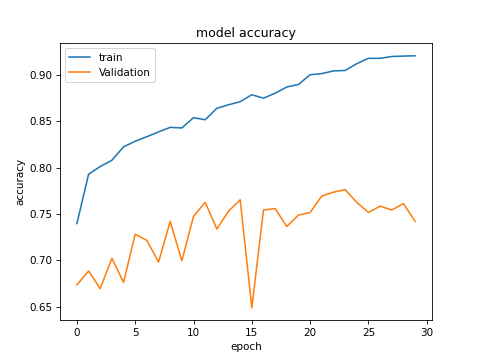

In [18]:
# summarize history for accuracy
plt.figure()
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.xticks([1,2,3])
plt.legend(['train', 'Validation'], loc='upper left')
#plt.vlines(x=22,ymin=0.6, ymax=0.95, colors='green', ls='--')
plt.savefig('accuracy.png')
plt.show()

**<font color='blue'>Plot Model Loss</font>**

<IPython.core.display.Javascript object>


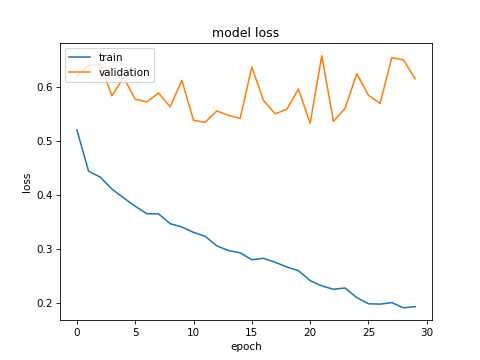

In [19]:
# summarize history for loss
plt.figure()
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.vlines(x=22,ymin=0.1, ymax=0.75, colors='green', ls='--')
plt.savefig('loss.png')
plt.show()

**<font color='blue' size='4'> Evaluate the model on the test dataset</font>**

In [20]:
#Load the trained model
model = models.load_model("NLP_Model")

In [21]:
#Evaluate the model accuracy
score,acc = model.evaluate(X_test_seq, y_test_le, verbose = 2, batch_size = batch_size)
print("Test loss: %.2f" % (score))
print("Test Accuracy: %.2f%%" % (acc*100))

26/26 - 1s - loss: 0.6319 - accuracy: 0.7592
Test loss: 0.63
Test Accuracy: 75.92%


In [22]:
#Predict the output of test data
y_pred = model.predict(X_test_seq)
y_pred = (y_pred > 0.5)
#print(y_pred)
from sklearn import metrics
#print(metrics.roc_auc_score(y_test_le, y_pred, average=None))
print(metrics.accuracy_score(y_test_le, y_pred))

0.7591687041564792


In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix,  classification_report
import itertools
import matplotlib.pyplot as plt


from gensim.models import KeyedVectors
embed_size=300
EMBEDDING_FILE = 'GoogleNews-vectors-negative300.bin'
embeddings_index = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

word_index = tk.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = (np.random.rand(nb_words, embed_size) - 0.5) / 5.0
for word, i in word_index.items():
    if i >= max_features: continue
    if word in embeddings_index:
        embedding_vector = embeddings_index.get_vector(word)
        embedding_matrix[i] = embedding_vector
## Peeking at the embedding matrix values
print(embedding_matrix.shape)

Confusion matrix, without normalization


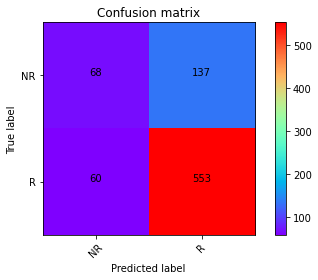

In [24]:
#class_names=["NR","R", "UR"]
class_names=["NR","R"]
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.rainbow):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_le, y_pred)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

In [25]:
#Classification Report
target_names = ['NR', 'R']
print(classification_report((y_test_le),y_pred,target_names=target_names))

              precision    recall  f1-score   support

          NR       0.53      0.33      0.41       205
           R       0.80      0.90      0.85       613

    accuracy                           0.76       818
   macro avg       0.67      0.62      0.63       818
weighted avg       0.73      0.76      0.74       818



**<font color='blue' size='4'> Predict Labels for COVID-19 Dataset</font>**

The COVID-19 Dataset has been obtained from Twitter using Twitter API, Bearer_token for Twitter data access and Tweepy package in Python. The data is for duration from 29 Mar 2020 to 15 Apr 2020. The data has been cleaned to contain only English tweets and Text of the tweets. The data obtained has been converted to CSV file.

In [26]:
#Load the COVID-19 test dataset
df_covid = pd.read_csv("covid_tweets_290315042020.csv")
df_covid.head()

,Unnamed: 0,Tweet
0,2,“People are just storing up. They are staying ...
1,6,.@PatriceHarrisMD spoke with @YahooFinance abo...
2,7,First medical team aiding #Wuhan in fight agai...
3,9,.@KathyGriffin: @realDonaldTrump Is 'Lying' Ab...
4,14,#CoronaUpdate | Johns Hopkins University has s...


In [27]:
#Convert to Lower case letters
df_covid['Tweet'] = df_covid['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_covid['Tweet'].head(10)

0    “people are just storing up. they are staying ...
1    .@patriceharrismd spoke with @yahoofinance abo...
2    first medical team aiding #wuhan in fight agai...
3    .@kathygriffin: @realdonaldtrump is 'lying' ab...
4    #coronaupdate | johns hopkins university has s...
5    singapore donates 40,000 test kits to the phil...
6    it's been a remarkable week for bold policy an...
7    #pentagon activates special protocols to fight...
8    lockdowns, drones: will things ever go back to...
9    does the #covid19 pandemic have you feeling ou...
Name: Tweet, dtype: object

In [28]:
# Punctuation marks are removed from the dataset
df_covid['Tweet'] = df_covid['Tweet'].str.replace('[^\w\s]','')
df_covid['Tweet'].head(10)

<ipython-input-28-7dcecc312af5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_covid['Tweet'] = df_covid['Tweet'].str.replace('[^\w\s]','')


0    people are just storing up they are staying at...
1    patriceharrismd spoke with yahoofinance about ...
2    first medical team aiding wuhan in fight again...
3    kathygriffin realdonaldtrump is lying about co...
4    coronaupdate  johns hopkins university has sai...
5    singapore donates 40000 test kits to the phili...
6    its been a remarkable week for bold policy ann...
7    pentagon activates special protocols to fight ...
8    lockdowns drones will things ever go back to n...
9    does the covid19 pandemic have you feeling out...
Name: Tweet, dtype: object

In [29]:
#Remove the stop words from the tweets using the nltk corpus
stop_words = stopwords.words('english')
df_covid['Tweet'] = df_covid['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df_covid['Tweet'].head(10)

0    people storing staying home freezing things ta...
1    patriceharrismd spoke yahoofinance covid19 sti...
2    first medical team aiding wuhan fight epidemic...
3    kathygriffin realdonaldtrump lying coronavirus...
4    coronaupdate johns hopkins university said aut...
5    singapore donates 40000 test kits philippines ...
6    remarkable week bold policy announcements covi...
7    pentagon activates special protocols fight cov...
8    lockdowns drones things ever go back normal co...
9    covid19 pandemic feeling outofcontrol overwhel...
Name: Tweet, dtype: object

In [30]:
#Removing rare words from the dataset by checking the frequency

#find all the tweets with minimum frequency
rare_words = pd.Series(' '.join(df_covid['Tweet']).split()).value_counts()[-10:]
rare_words

#Remove the tweets with rare words
rare_words = list(rare_words.index)
#rare_words_test = list(rare_words_test.index)
df_covid['Tweet'] = df_covid['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))
df_covid['Tweet'].head(10)

0    people storing staying home freezing things ta...
1    patriceharrismd spoke yahoofinance covid19 sti...
2    first medical team aiding wuhan fight epidemic...
3    kathygriffin realdonaldtrump lying coronavirus...
4    coronaupdate johns hopkins university said aut...
5    singapore donates 40000 test kits philippines ...
6    remarkable week bold policy announcements covi...
7    pentagon activates special protocols fight cov...
8    lockdowns drones things ever go back normal co...
9    covid19 pandemic feeling outofcontrol overwhel...
Name: Tweet, dtype: object

In [31]:
X_test = df_covid['Tweet']
X_test_covid = tk.texts_to_sequences(X_test)

print(" Number of Test Tweets: " , len(X_test_covid))

X_test_covid = pad_sequences(X_test_covid,maxlen=max_len)
y_pred = model.predict(X_test_covid)

y_pred = (y_pred > 0.5)
#print(" y: " , y_pred[0])

 Number of Test Tweets:  313036


In [32]:
rumour_count = np.count_nonzero(y_pred, axis=None)
print("Rumours:",rumour_count )
nonrumour_count= y_pred.shape[0] - rumour_count
print("Non-Rumours:",nonrumour_count)

Rumours: 108793
Non-Rumours: 204243


------- End of File -------